Tensors are super useful to PyTorch, its how we load data in. A tensor can be thought of as a 3-D matrix, a bunch of matrices stacked on one another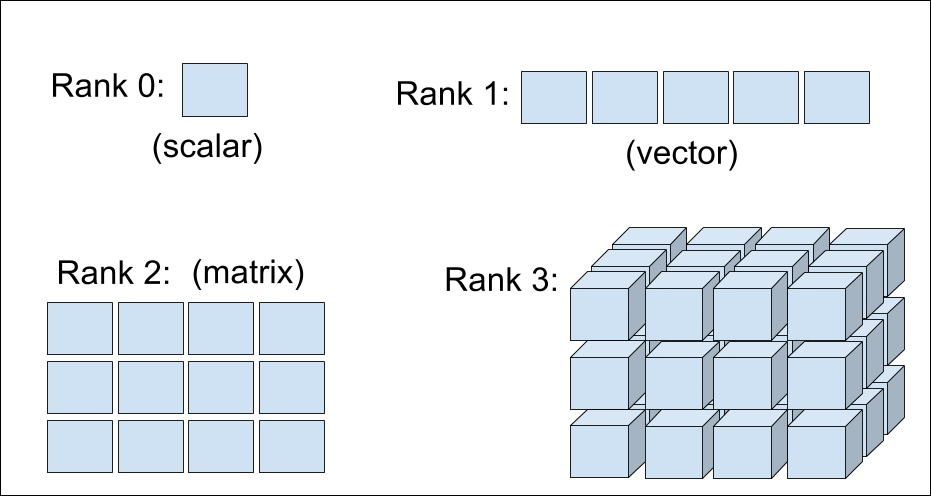

In [4]:
# basic PyTorch operations with Tensors

import torch
import torch
import torchvision
from torchvision import transforms, datasets

x = torch.Tensor([2,5])
y = torch.Tensor([5,2])

print(x*y)

tensor([10., 10.])


In [5]:
print(x.shape)

torch.Size([2])


In [6]:
rand = torch.rand([5,5]) # specifying dimensions
zeros = torch.zeros([5,5])
print(zeros)
print(rand)

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])
tensor([[0.8971, 0.3009, 0.7590, 0.9561, 0.0343],
        [0.0406, 0.3817, 0.7042, 0.3501, 0.5983],
        [0.2536, 0.6338, 0.1295, 0.4912, 0.0911],
        [0.5342, 0.0338, 0.3960, 0.0528, 0.9063],
        [0.9300, 0.1419, 0.5682, 0.0509, 0.0370]])


In [7]:
zeros.view([1,25]) # reshaping dimensions

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0.]])

In [8]:
# we will be using MNIST
'''
this is a cheat, we are using PyTorch premade stuff
From the parameters, you can see that the MNIST set has already been split with
train=True (for the training), train=False (for the testing).
All of the data has also already been transformed to tensors (transforms.ToTensor())
'''

'''
We designate the PyTorch DataLoader objects
Data is shuffled so that there is randomness and no bad patterns form. We don't want just load
data sequentially without shuffling as our model may be influenced by it unknowingly.
batch_size = 32 pertains to how the data is read in, we don't read it in at once or else our matrices will get too big.
With each new batch passed in, the neural net weights and neurons can recalculate (backpropagate),
if we just passed in the entire dataset, then there is way too much overflow in size
Each passed in batch has their own gradients, loss, and backprops
'''
batch_size = 32

# MNIST dataset
train_dataset = torchvision.datasets.MNIST(root='data',
                                           train=True, 
                                           transform=transforms.ToTensor(),
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='data',
                                          train=False,
                                          transform=transforms.ToTensor())

# Data loader
trainset = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

testset = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw




Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw

Processing...


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:502: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:143.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


Done!


About MNIST: The MNIST database (Modified National Institute of Standards and Technology database) is a large database of handwritten digits that is commonly used for training various image processing systems. The database is also widely used for training and testing in the field of machine learning. It was created by "re-mixing" the samples from NIST's original datasets.

Building the Neural Net

In [9]:
import torch.nn as nn
import torch.nn.functional as F

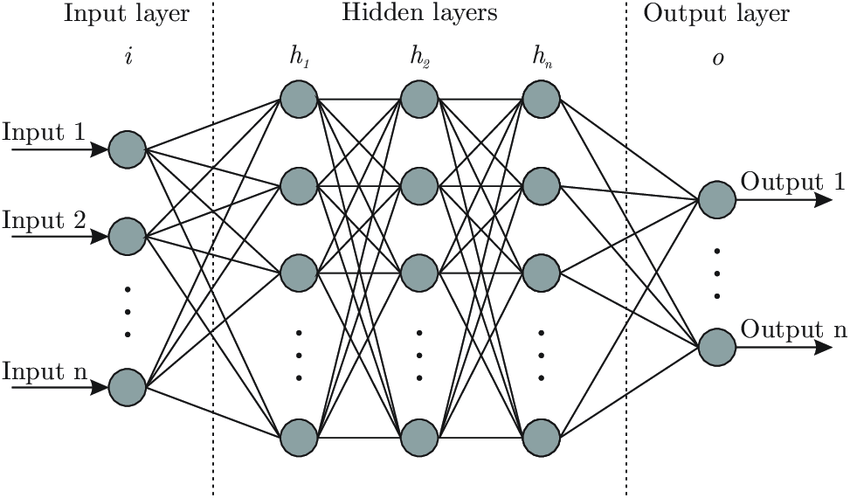

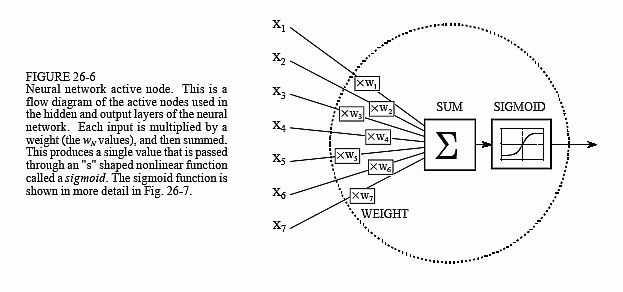

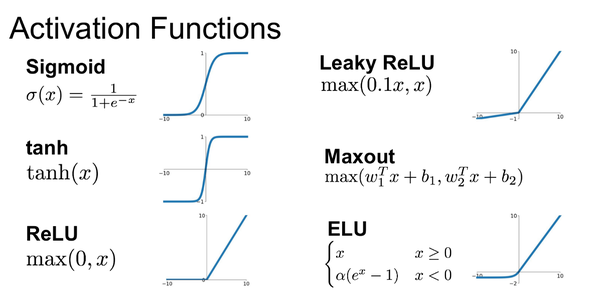

Here, we are defining the layers of our neural net. Layers we use: linear

Each of our nn.Linear layers expects the first parameter to be the input size, and the 2nd parameter is the output size. (we see it goes 64x64 into 64x10)

We output 10 because there are 10 classes for our mnist dataset (1-10)

The init initializes all the layers and sets them to the variables. The forward function defines the forward pass in a feed-forward network: we go from inputs to outputs




In [10]:
'''
if you are unfamiliar with classes in Python, __init__ basically gets called whenever
you create a BaseNet object
'''

class BaseNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 10)

    def forward(self, x):
        '''
        Neural nets mimic brain neurons that either are firing, or not (1 or 0?). 
        We use activation functions to take the sum of the input data * weights, 
        and then to determine if the neuron is firing or not. 
        Relu is an example of this: keeps our data scaled between 0 and 1
        '''
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        '''
        softmax is final activation, it puts stuff in terms of percentages that 
        add up to 1: we end up outputting the one with highest probability
        '''
        return F.log_softmax(x, dim=1)

In [11]:
# we now have a functional NN that we can pass stuff to
test_input = torch.randn((28,28)) # this will be a test image

test_input = test_input.view(-1,28*28) # we reshape for our input
# the -1 just means any size
model = BaseNet()
output = model(test_input)

In [12]:
print(output)

tensor([[-2.3348, -2.3570, -2.2990, -2.2124, -2.2013, -2.4182, -2.2811, -2.3514,
         -2.2390, -2.3544]], grad_fn=<LogSoftmaxBackward>)


What we need next: iterate over our data, pass to the model, calculate loss from the result, and then do backpropagation to slowly fit our model to the data

All our data is already in batches and we just need to iterate

In [14]:
import torch.optim as optim

# for more info: https://machinelearningmastery.com/cross-entropy-for-machine-learning/
loss_function = nn.CrossEntropyLoss()
# for more info: https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/
optimizer = optim.Adam(model.parameters(), lr=0.001) # adam is adaptive momentum

num_epochs = 10

loss_function: how far off we are from right answer

optimizer: adjusts our model's adjustable parameters like the weights, to slowly, over time, fit our data

Learning rate (lr): learning rate dictates the magnitude of changes that the optimizer can make at a time

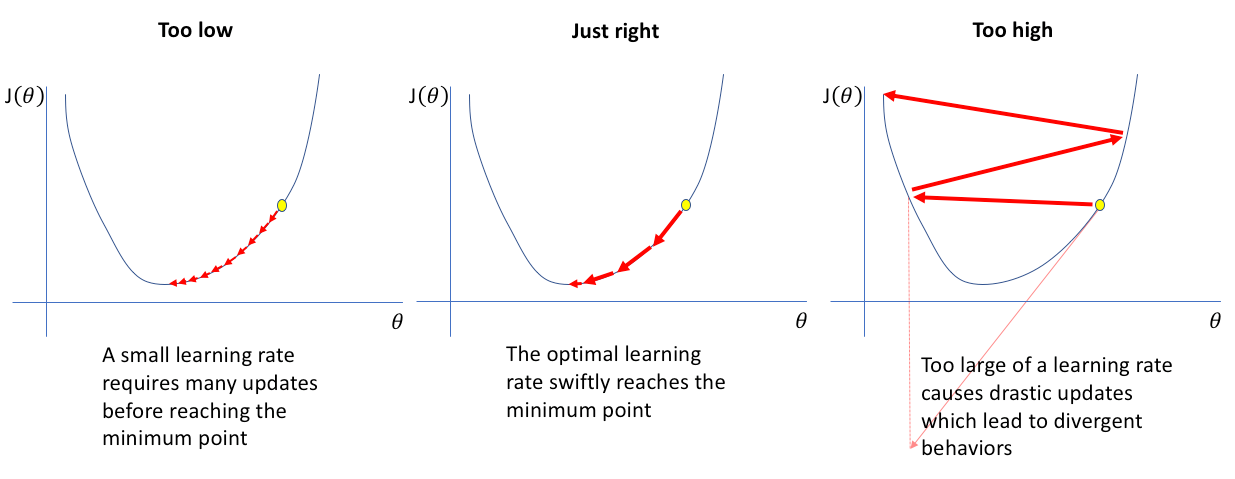

In [15]:
for epoch in range(num_epochs): # 10 passes
  for data in trainset:  # `data` is a batch of data
    feat, targ = data  # batches of features and batches of targets
    model.zero_grad()  # sets gradients to 0 before loss calc. Do this at every step
    '''
    setting model.zero_grad is important as it prevents us from compounding gradients
    If we don't, the gradients add up and we optimize on old stuff that we've already optimized
    '''
    output = model(feat.view(-1,784))  # pass in the reshaped batch (recall they are 28x28 atm)(we see that the features are contained here)
    loss = loss_function(output, targ)  # calc and grab the loss value (we see that the targets are contained here)
    loss.backward()  # apply this loss backwards thru the network's parameters
    optimizer.step()  # optimize weights to account for loss/gradients
  print(loss)  # print loss (should decline)

tensor(0.2564, grad_fn=<NllLossBackward>)
tensor(0.0131, grad_fn=<NllLossBackward>)
tensor(0.0185, grad_fn=<NllLossBackward>)
tensor(0.0612, grad_fn=<NllLossBackward>)
tensor(0.0288, grad_fn=<NllLossBackward>)
tensor(0.0287, grad_fn=<NllLossBackward>)
tensor(0.0071, grad_fn=<NllLossBackward>)
tensor(0.0064, grad_fn=<NllLossBackward>)
tensor(0.0199, grad_fn=<NllLossBackward>)
tensor(0.0008, grad_fn=<NllLossBackward>)


In summary:
Grab the features and labels from current batch

Zero the gradients

Pass the data through the network

Calculate the loss

Adjust weights in the network (try to decrease loss)


In [16]:
# In test phase, we don't need to compute gradients (for memory efficiency)
with torch.no_grad():
    correct = 0
    total = 0
    for feat, targ in testset:
        outputs = model(feat.view(-1,784))
        _, predicted = torch.max(outputs.data, 1)
        total += targ.size(0)
        correct += (predicted == targ).sum().item()

    print('Accuracy of the network on the MNIST test images: {} %'.format(100 * correct / total))

Accuracy of the network on the MNIST test images: 97.24 %


Here, we are defining the layers of our upscaled neural net. Layers we use: convolutional, max pooling, average pooling, linear

We output 10 because there are 10 classes for our mnist dataset (1-10)

In [17]:
# Now we scale up to a more complex convolutional model
# The core concepts are still the same
'''
if you are unfamiliar with classes in Python, __init__ basically gets called whenever
you create a Net object
'''

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        # torch.nn.Conv2d(in_channels, out_channels, kernel_size, stride=1, padding=0, dilation=1, groups=1, bias=True, padding_mode='zeros')
        # https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html
        self.conv1 = nn.Conv2d(1, 64, kernel_size=(3, 3), padding=1) # making a layer
        self.conv2 = nn.Conv2d(64, 64, kernel_size=(3, 3), padding=1)
        # more info on pooling here: https://machinelearningmastery.com/pooling-layers-for-convolutional-neural-networks/
        self.max_pool = nn.MaxPool2d(2, 2)
        self.global_pool = nn.AvgPool2d(7)
        # these are just regular linear layers
        self.fc1 = nn.Linear(64, 64)
        self.fc2 = nn.Linear(64, 10)


    def forward(self, x):
      '''
      Neural nets mimic brain neurons that either are firing, or not (1 or 0?). 
      We use activation functions to take the sum of the input data * weights, 
      and then to determine if the neuron is firing or not. 
      Relu is an example of this: keeps our data scaled between 0 and 1
      '''
      x = F.relu(self.conv1(x))
      x = F.relu(self.conv2(x))
      x = self.max_pool(x)

      x = F.relu(self.conv2(x))
      x = F.relu(self.conv2(x))
      x = self.max_pool(x)

      x = F.relu(self.conv2(x))
      x = F.relu(self.conv2(x))
      x = self.global_pool(x)

      x = x.view(-1, 64)

      x = F.relu(self.fc1(x))
      x = self.fc2(x)

      '''
      softmax is final activation, it puts stuff in terms of percentages that 
      add up to 1: we end up outputting the one with highest probability
      '''
      x = F.log_softmax(x)

      return x

In [18]:
model_upscale = Net()
print(model_upscale)

Net(
  (conv1): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (max_pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (global_pool): AvgPool2d(kernel_size=7, stride=7, padding=0)
  (fc1): Linear(in_features=64, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=10, bias=True)
)


In [ ]:
# designate the number of epochs and the batch size: these are configurable
# variables related to your neural network known as hyperparameters
num_epochs = 10
batch_size = 32

# always include this in google colab stuff as it will enable the GPU
# if you don't put this line in, you may end up accidentally using your cpu
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# this will give you the info on GPUs 
# I like to include this line as sometimes I forget to activate my Colab GPU
# if no GPU is active, an error will be thrown
print(torch.cuda.device_count())
print(torch.cuda.get_device_name(0))

In [ ]:
# designate optimizer, learning rate, and loss
optimizer = torch.optim.Adam(model_upscale.parameters(), lr=0.001)
loss_function = nn.CrossEntropyLoss()

In [ ]:
model_upscale.to(device)

In [ ]:
# Train the model
total_step = len(trainset)

for epoch in range(num_epochs):
  for i, (feat, targ) in enumerate(trainset): # The dimensions of this model are different
    # Move tensors to the configured device
    # if you don't have everything on the same device pytorch will error out
    feat = feat.to(device)
    targ = targ.to(device)

    # Forward pass
    outputs = model_upscale(feat)
    loss = loss_function(outputs, targ)

    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (i+1) % 100 == 0:
      print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
      .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

In [ ]:
# In test phase, we don't need to compute gradients (for memory efficiency)
with torch.no_grad():
    correct = 0
    total = 0
    for feat, targ in testset:
        feat = feat.to(device)
        targ = targ.to(device)
        outputs = model_upscale(feat)
        _, predicted = torch.max(outputs.data, 1)
        total += targ.size(0)
        correct += (predicted == targ).sum().item()

    print('Accuracy of the network on the MNIST test images: {} %'.format(100 * correct / total))

In [ ]:
# save the model so it can be loaded again for later use
torch.save(model_upscale.state_dict(), 'conv_model.ckpt')

And those are the basics of building a neural net with pytorch!